<h1>Практическое задание 6, двойка 6</h1>

<i><h5>Условия задачи 6 варианта: решите задачу о количестве способов достичь точки n из точки 1, если кузнечик умеет прыгать +1, +3 и *2.</i></h5>

<h3><b>Оптимальное решение задачи без стоимости</b></h3>

In [2]:
def count_ways(n):
    if n<=1:
        return 1
    d=[0]*(n+1)
    d[1]=1
    for i in range(2,n+1):
        d[i]+=d[i-1]
        d[i]+=d[i-3]
        if i%2==0:
            d[i]+=d[i//2]
    return d[n]
n = int(input(('Введите значение n: ')))
result = count_ways(n)
print(f'Кол-во способов достичь {n} из точки 1: {result}')


Кол-во способов достичь 15 из точки 1: 448


<h3><b>Оптимальное решение задачи со стоимостью, предполагая, что N=100, а цена на каждой ступеньке увеличивается в арифметической прогрессии</b></h3>

Минимальная сумма достичь 100: 220
Цены за выбранные ступеньки: [3, 6, 12, 24, 25, 50, 100]
Индексы выбранных ступенек: [3, 6, 12, 24, 25, 50, 100]
Полная цена за выбранные ступеньки: [3, 9, 21, 45, 70, 120, 220]


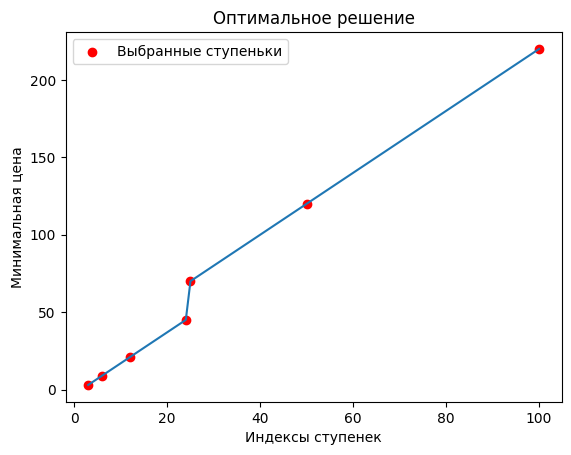

In [3]:
import matplotlib.pyplot as plt

def price_ways(n, d):
    if n <= 0:
        return 0
    
    price = [0] * (n + 1)
    for i in range(1, n + 1):
        price[i] = price[i - 1] + d

    dp = [0] * (n + 1)
    dp[1] = price[1]
    dp[2] = price[2] + dp[1]
    dp[3] = min(dp[2], dp[1]) + price[3]

    path = [[] for _ in range(n + 1)]
    path[1] = [1]
    path[2] = [1, 2]
    path[3] = [1, 3]

    for i in range(3, n + 1):
        dp[i] = min(dp[i - 1], dp[i - 3]) + price[i]
        if dp[i - 1] < dp[i - 3]:
            path[i] = path[i - 1] + [i]
        else:
            path[i] = path[i - 3] + [i]
        if i % 2 == 0:
            if dp[i // 2] + price[i] < dp[i]:
                dp[i] = dp[i // 2] + price[i]
                path[i] = path[i // 2] + [i]

    prices_optimal_path = [price[i] for i in path[n]]
    indices_optimal_path = path[n]

    return dp[n], prices_optimal_path, indices_optimal_path

n = int(input('Введите значение n: '))
d = int(input('Введите значение d: '))
result, prices, indices = price_ways(n, d)

full_price =[0]*len(prices)

for i in range(len(full_price)):
    full_price[i]=full_price[i-1]+prices[i]
   
print(f'Минимальная сумма достичь {n}: {result}')
print('Цены за выбранные ступеньки:', prices)
print('Индексы выбранных ступенек:', indices)
print('Полная цена за выбранные ступеньки:', full_price)

x = indices
y = full_price

plt.plot(x, y)  
plt.scatter(x, y, color='red', marker='o', label='Выбранные ступеньки')
plt.xlabel('Индексы ступенек') 
plt.ylabel('Минимальная цена') 
plt.title('Оптимальное решение') 
plt.legend()
plt.show()  


<h3><b>Домашнее задание к практической работе: решить задачу с модификацией - пользователь вводит количество шагов и возможности скачков кузнечика</b></h3>

Введите шаг для движения вперед (введите 0 для завершения ввода):
Введите множители для индекса ступеньки (введите 0 для завершения ввода):
Минимальная сумма:  292
Оптимальный путь: [4, 8, 12, 24, 48, 96, 100]
Изменение цены от выбора ступеньки: [4, 12, 24, 48, 96, 192, 292]
Кол-во шагов: 7


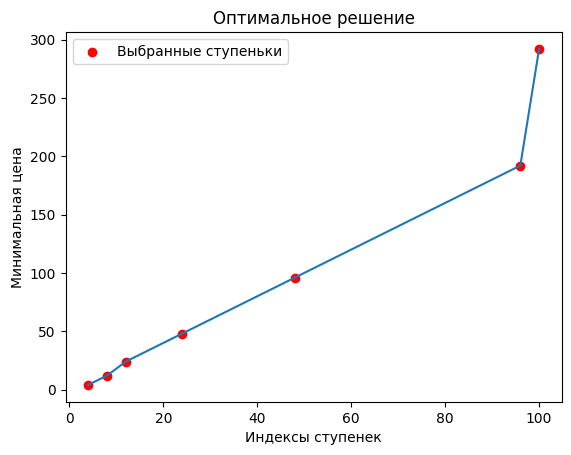

In [7]:
import matplotlib.pyplot as plt

def price_ways(n, d):
    if n <= 0:
        return 0
    price = [0] * (n + 1)
    for i in range(1, n + 1):
        price[i] = price[i - 1] + d
    return price

def find_optimal_path(n, d, forward_steps, multiplier_steps):
    if n <= 0:
        return 0
    price = [0] * (n + 1)
    for i in range(1, n + 1):
        price[i] = price[i - 1] + d
    cost = [float('inf')] * (n + 1)
    cost[0] = 0  

    prev_step = [0] * (n + 1)

    for i in range(1, n + 1):
        for j in range(len(forward_steps)):
            if i - forward_steps[j] >= 0:
                current_cost = cost[i - forward_steps[j]] + d
                if current_cost < cost[i]:
                    cost[i] = current_cost
                    prev_step[i] = i - forward_steps[j]

        for j in range(len(multiplier_steps)):
            if i % multiplier_steps[j] == 0:
                current_cost = cost[i // multiplier_steps[j]] + d
                if current_cost < cost[i]:
                    cost[i] = current_cost
                    prev_step[i] = i // multiplier_steps[j]

    optimal_path = []
    current_step = n
    while current_step > 0:
        optimal_path.append(current_step)
        current_step = prev_step[current_step]

    optimal_path.reverse()
    
    return optimal_path, cost[n]

n = int(input("Введите число ступенек: "))
d = int(input("Введите шаг повышения цены: "))

forward_steps = []
print("Введите шаг для движения вперед (введите 0 для завершения ввода):")
while True:
    step = int(input())
    if step == 0:
        break
    forward_steps.append(step)

multi_steps = []
print("Введите множители для индекса ступеньки (введите 0 для завершения ввода):")
while True:
    multiplier = int(input())
    if multiplier == 0:
        break
    multi_steps.append(multiplier)
price = price_ways(n,d)
optimal_path, steps = find_optimal_path(n, d, forward_steps, multi_steps)
full_price=[0]*len(optimal_path)

for i in range (len(optimal_path)):
    full_price[i] = price[optimal_path[i]]+full_price[i-1]
print("Минимальная сумма: ", full_price[len(full_price)-1])
print("Оптимальный путь:", optimal_path)
print("Изменение цены от выбора ступеньки:",full_price)
print("Кол-во шагов:", steps)

x = optimal_path
y = full_price

plt.plot(x, y)  
plt.scatter(x, y, color='red', marker='o', label='Выбранные ступеньки')
plt.xlabel('Индексы ступенек') 
plt.ylabel('Минимальная цена') 
plt.title('Оптимальное решение') 
plt.legend()
plt.show()  


Выбранные значения 
- n=100
- d=1
- шаги для движения вперед: 1 3 4
- множители для индексов ступеньки: 2